<a href="https://colab.research.google.com/github/RupeshRang95/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Importing the required packages and libraries
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn import preprocessing
import statsmodels.api as sm
import scipy.optimize as opt
import numpy as np
import pylab as pl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from google.colab import files
import io



In [17]:
#Reading the csv file
df = pd.read_csv('massachusetts.csv')
df.drop(['education'], inplace=True, axis=1)

In [18]:
#Quick glance of how the data looks
df.head

<bound method NDFrame.head of       male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4235     0   48              1        20.0     NaN                0   
4236     0   44              1        15.0     0.0                0   
4237     0   52              0         0.0     0.0                0   
4238     1   40              0         0.0     0.0                0   
4239     0   39              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  106.0

In [20]:
#Removinh NaN
df.dropna(axis=0, inplace=True)
print(df.head(), df.shape)
print(df.TenYearCHD.value_counts())

   male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0   (3751, 15)
0    3179

<Axes: xlabel='TenYearCHD', ylabel='count'>

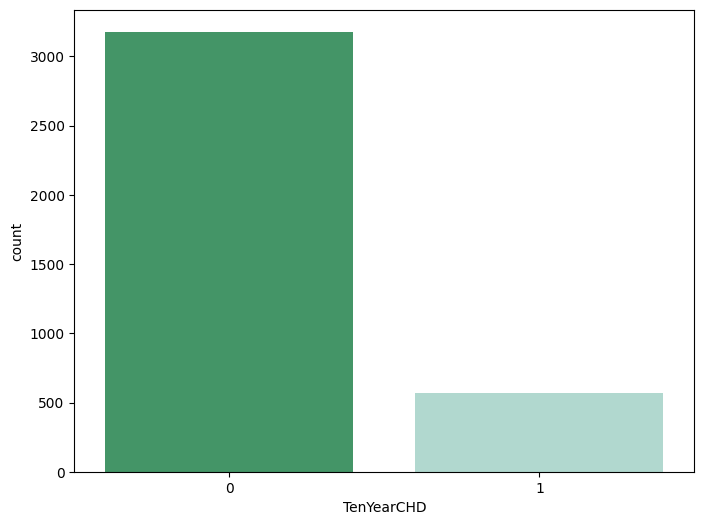

In [24]:
 # Counting number of patients affected with Chronic Heart Disease
 plt.figure(figsize=(8,6))
 sn.countplot(x="TenYearCHD", data=df, palette="BuGn_r")
 # 0 shows the number of people affected and 1 shows the number of people not affected

In [25]:
#Training and testing sets
x = np.asarray(df[['age','male','cigsPerDay','totChol','glucose']])
y = np.asarray(df['TenYearCHD'])

In [27]:
#Normalizing the dataset
x = preprocessing.StandardScaler().fit(x).transform(x)

In [28]:
#Properly training x and y sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)
print('Train set: ', x_train.shape, y_train.shape)
print('Test set: ', x_test.shape, y_test.shape)

Train set:  (2625, 5) (2625,)
Test set:  (1126, 5) (1126,)


In [29]:
#Modleing the dataset
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [30]:
#Evaluating and Accuracy
print('')
print('Accuracy of the mode; in Jaccard score is: ', jaccard_score(y_test, y_pred))


Accuracy of the mode; in Jaccard score is:  0.045454545454545456


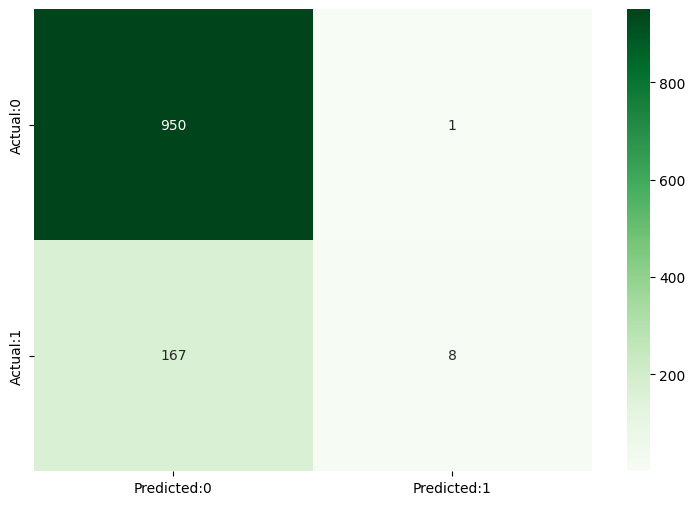

In [33]:
#Using the confusion matrix to check the accuracy of the model
cm = confusion_matrix(y_test, y_pred)
cm_setup = pd.DataFrame(data=cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0', 'Actual:1'])
plt.figure(figsize=(9,6))
sn.heatmap(cm_setup, annot=True, fmt='d', cmap="Greens")
plt.show()

In [34]:
#Classification Report
print('The details for the confusion matrix is: ')
print(classification_report(y_test,y_pred))

The details for the confusion matrix is: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       951
           1       0.89      0.05      0.09       175

    accuracy                           0.85      1126
   macro avg       0.87      0.52      0.50      1126
weighted avg       0.86      0.85      0.79      1126

